Plotting the Condition Number of Problem 1 b)

/tmp/ipykernel_31064/3345158306.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  [(m + 1) / 2,  (m + 1)**2 / (3 * m)]


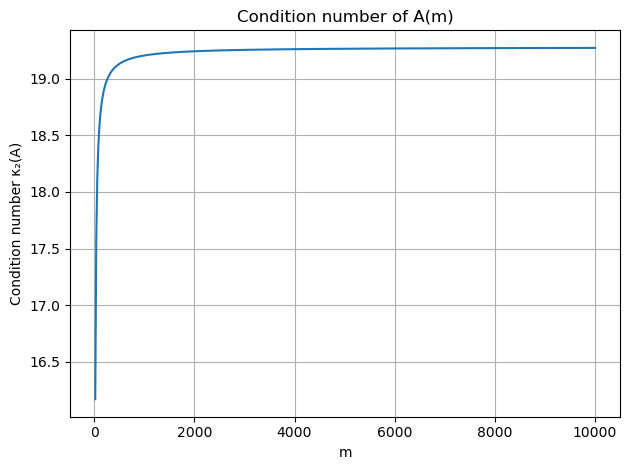

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def cond_number(m):

    """
    Args:
        m (float): parameter for the matrix A(m)
    Returns:
        float: condition number of A(m)
    Raises:
        ZeroDivisionError: if m = 0
        np.linalg.LinAlgError: if A(m) is not invertible
    """

    A = np.array([
        [m + 1,          (m + 1) / 2],
        [(m + 1) / 2,  (m + 1)**2 / (3 * m)]
    ])
    A_inv = np.linalg.inv(A)
    return np.linalg.norm(A, 2) * np.linalg.norm(A_inv, 2)

def main(): 
    M = float(input("Enter maximum m (M > 0): "))
    N = int(input("Enter number of sample points: ")) #however the user wants to plot 

    m_vals = np.linspace(0, M, N)
    conds  = []

    for m in m_vals:
        try:
            conds.append(cond_number(m))
        except (ZeroDivisionError, np.linalg.LinAlgError):
            conds.append(np.inf) #if it is not invertible

    plt.figure()
    plt.plot(m_vals, conds)
    plt.xlabel('m')
    plt.ylabel('Condition number κ₂(A)')
    plt.title('Condition number of A(m)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

poly_ls(m,n) -> problem 1 c)

In [41]:
import numpy as np

def poly_ls(m, n):

    """
    Build the (n+1) x (n+1) matrix A for least-squares polynomial fitting.
    
    Args:
        m (int): number of subintervals (m >= 0)
        n (int): polynomial degree (n >= 0)
    Returns:
        np.ndarray: shape (n+1, n+1) Gram matrix
    Raises:
        ValueError: if m or n is negative or not integer
    """

    if not isinstance(m, int) or not isinstance(n, int):
        raise ValueError("m and n must be integers")
    if m < 0 or n < 0:
        raise ValueError("m and n must be non-negative")

    x = np.linspace(0, 1, m+1) #sample space

    A = np.zeros((n+1, n+1), dtype=float) #intializes 0 matrix to be filled
    np.set_printoptions(precision=3, suppress=True)
    for j in range(n+1):
        for k in range(n+1):
            A[j, k] = np.sum(x**(j + k)) #fills each entry

    return A

for m, n in [(1, 1), (2, 2), (2, 3)]: #trivial examples
    M = poly_ls(m, n)
    print(f"m = {m}, n = {n}:")
    print(M, end="\n\n")


m = 1, n = 1:
[[2. 1.]
 [1. 1.]]

m = 2, n = 2:
[[3.    1.5   1.25 ]
 [1.5   1.25  1.125]
 [1.25  1.125 1.062]]

m = 2, n = 3:
[[3.    1.5   1.25  1.125]
 [1.5   1.25  1.125 1.062]
 [1.25  1.125 1.062 1.031]
 [1.125 1.062 1.031 1.016]]

